In [21]:
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate
plt.rcParams['font.sans-serif'] = ['SimHei']  # 黑体
plt.rcParams['axes.unicode_minus'] = False

# 元素反应
元素反应过于复杂,同时受到多个参与反应的角色数据、敌人数据、环境数据的影响  
- 增幅反应(Amplifying): 元素之间反应对伤害进行增幅，如**蒸发**、**融化**
- 剧变反应(Transformative): 元素之间反应造成额外效果(大部分会产生额外伤害,有些并没有伤害但有额外效果如冻结、结晶)，如**超导**、**超载**、**感电**、**绽放**、**冻结/碎冰**

## 增幅反应

## 剧变反应
造成的额外伤害(与角色的普通伤害、战技、元素爆发伤害无关)与一个固定的基础伤害有关,角色等级和反应类型会影响其伤害,此外角色的精通和各种奇怪的方式(角色天赋,副本BUFF等)提供反应伤害加成,对不同敌人也有不同的元素抗性(反应会造成元素伤害),甚至还有额外的收益(如草神命座2可以使绽放反应暴击)

- 超导: 冰+雷, 造成雷元素伤害
- 超载：雷+火, 造成火元素伤害

### 伤害计算
$$剧变反应伤害 = 反应基础伤害 * 等级系数 * 反应基础倍率 * 反应伤害提升系数 * 抗性系数 * 额外收益$$

反应基础伤害、等级系数、反应基础倍率可看下图:
![剧变反应基础伤害](../asset/image/genshin/transformative_reaction_base_damage.png)  

#### 精通提供的反应伤害加成
看精通的描述可以发现会对不同的元素反应提供不同的加成:  
$$\frac{16*精通}{2000+精通}$$

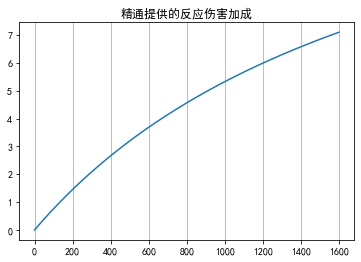

In [22]:
x = np.arange(0, 1600)
plt.plot(x, (16 * x)/(2000 + x))
plt.grid(axis='x')
plt.title('精通提供的反应伤害加成')
plt.show()

#### 伤害收益
1000精通将带来`533.33%`的反应伤害加成
对于10%抗性(大部分怪物抗性)的敌人仅能造成`90%`的伤害

In [23]:
def simpleTRDamange(r, em):
    return 1446.85 * r * (1 + (16 * em)/(2000 + em)) * 0.9


trRates = (
    ('超导', 0.5),
    ('扩散', 0.6),
    ('碎冰', 1.5),
    ('超载', 2),
    ('感电', 1.2),
    ('燃烧-0.26s', 0.25),
    ('绽放', 2),
    ('超/烈绽放', 3)
)
transformativeDamangeTable = []
for rate in trRates:
    transformativeDamangeTable.append((
        rate[0],
        simpleTRDamange(rate[1], 1000)
    ))

print(tabulate(transformativeDamangeTable, headers=[
      '反应类型', '1000精通造成的伤害'], floatfmt='.2f', tablefmt='github'))

| 反应类型   |   1000精通造成的伤害 |
|------------|----------------------|
| 超导       |              4123.52 |
| 扩散       |              4948.23 |
| 碎冰       |             12370.57 |
| 超载       |             16494.09 |
| 感电       |              9896.45 |
| 燃烧-0.26s |              2061.76 |
| 绽放       |             16494.09 |
| 超/烈绽放  |             24741.13 |


由于剧变反应基于一个固定的伤害数值，角色属性(忽略等级)中仅有精通可以对剧变反应伤害加成造成影响，而提升精通必然要牺牲攻击加成、暴击爆伤等影响技能伤害的属性。除去草系绽放外，其他反应很难比得过增幅反应。但在3.0版本引入草系之后，绽放、超/烈绽放反应不但有更高的反应基础系数，草系角色天赋、圣遗物、元素共鸣也给反应带来更多的加成和抗性缩减，高效的产种方式也使得反应触发次数大幅提高。